## Objective: The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('bank-full(1).csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Summary of Data

In [56]:
### Categorical Data:
1. job          0
2. marital      0
3. education    0
4. default      0
5. housing      0
6. loan         0
7. contact      0
8. month        0
9. poutcome     0
10.deposit      0

### Numerical Variables:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0

# Data Cleaning and Pre-Processing

In [4]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Checking the null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.select_dtypes(include = "object")

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
df.select_dtypes(exclude = "object")

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [9]:
# Extracting the unique values from categorical columns
for columns in df.select_dtypes(include = "object"):
    unique_values = df[columns].unique()
    print(f"unique values in '{columns}': {unique_values}")

unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
unique values in 'marital': ['married' 'single' 'divorced']
unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
unique values in 'default': ['no' 'yes']
unique values in 'housing': ['yes' 'no']
unique values in 'loan': ['no' 'yes']
unique values in 'contact': ['unknown' 'cellular' 'telephone']
unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']
unique values in 'deposit': ['no' 'yes']


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Let's extract a new feature from 'age' for better visualization
df["age_group"] = ""

for i, row in df.iterrows():
    if row["age"] <= 35:
        df.at[i, "age_group"] = "adults"
    elif row["age"] <= 50:
        df.at[i, "age_group"] = "middle age"
    else:
        df.at[i, "age_group"] = "old"

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,adults
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,adults


In [13]:
df.query("age_group == 'middle age'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,middle age
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,middle age
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no,middle age
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes,middle age
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,middle age
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes,middle age


In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


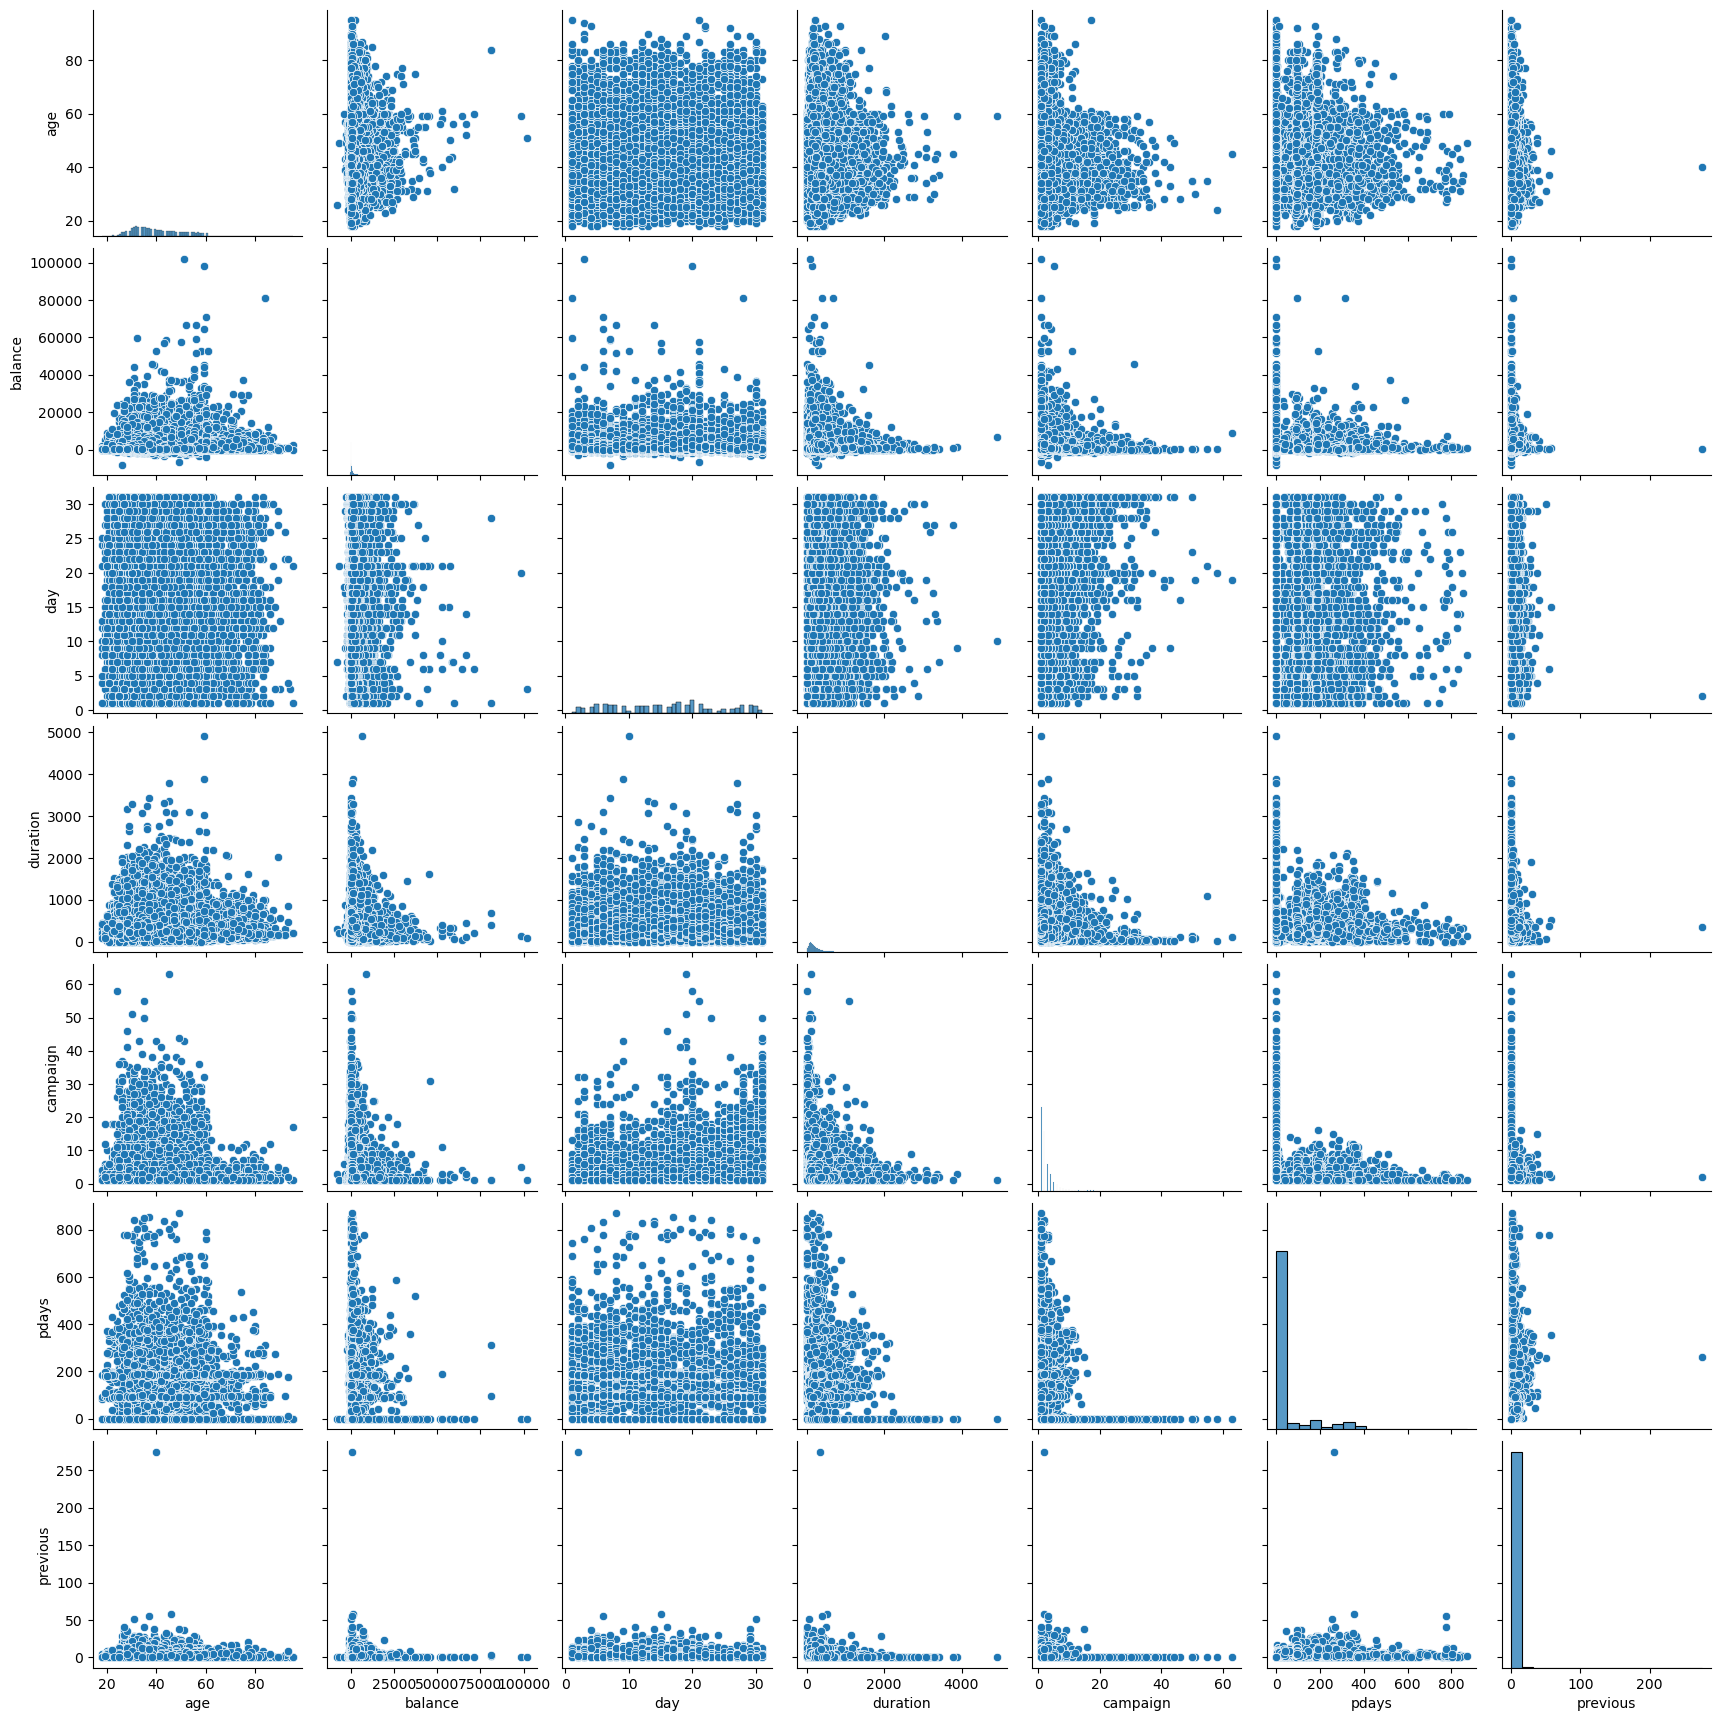

In [15]:
sns.pairplot(df)

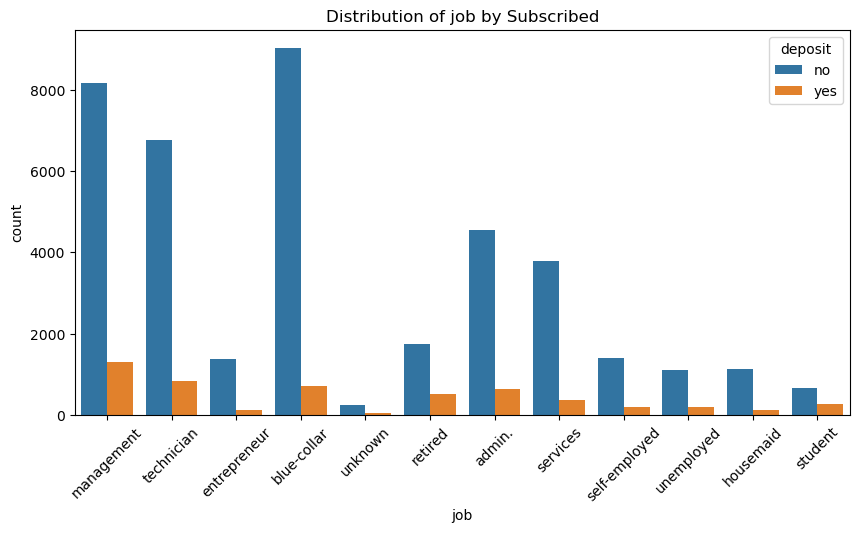

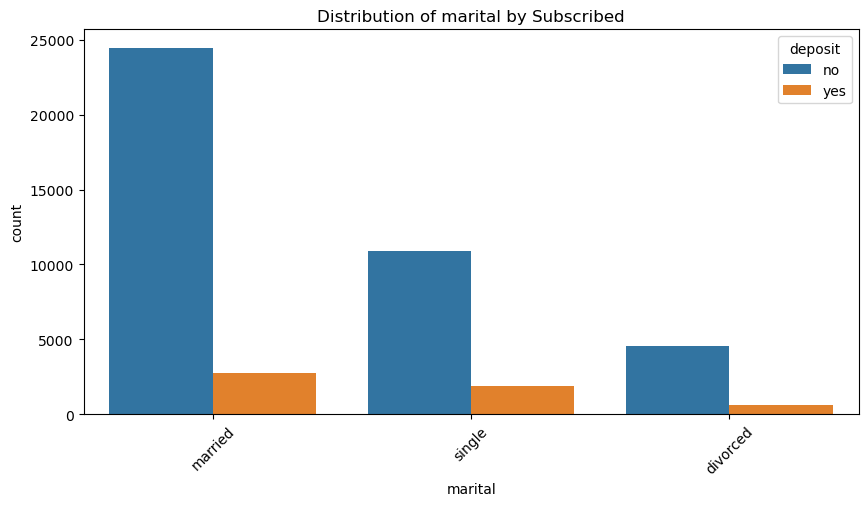

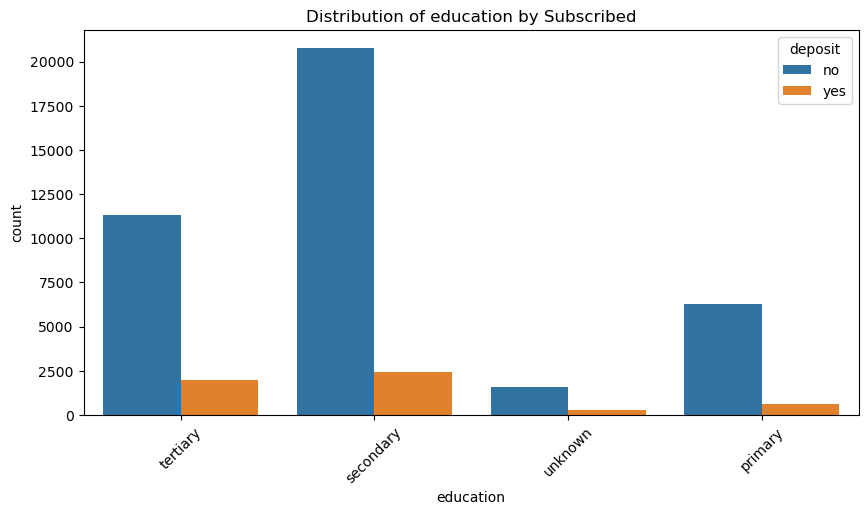

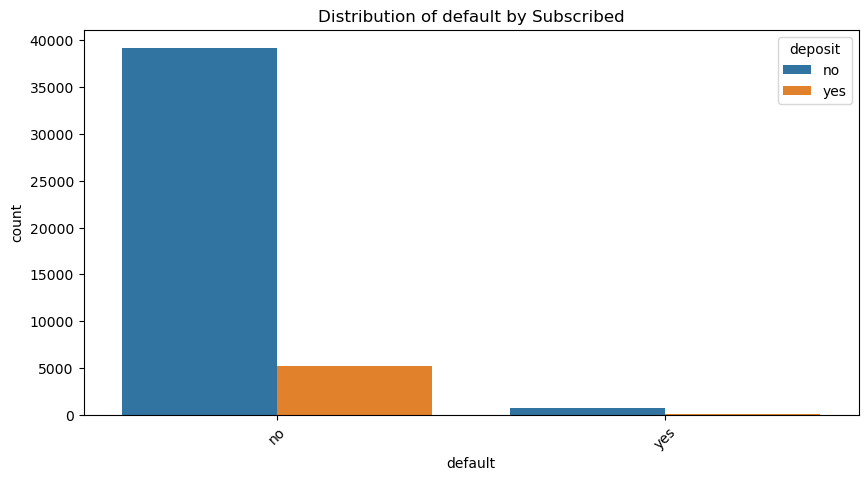

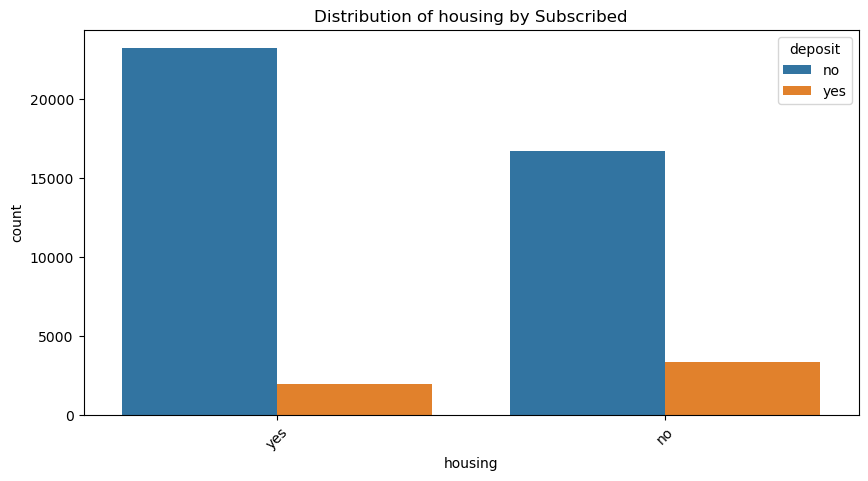

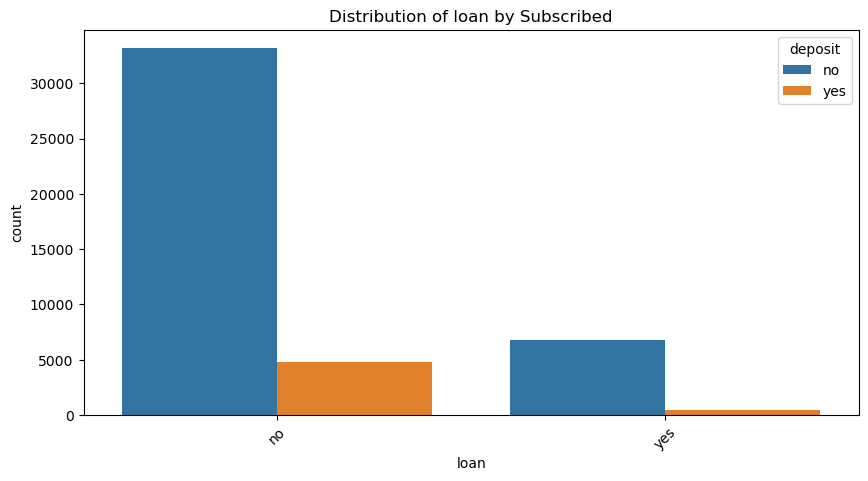

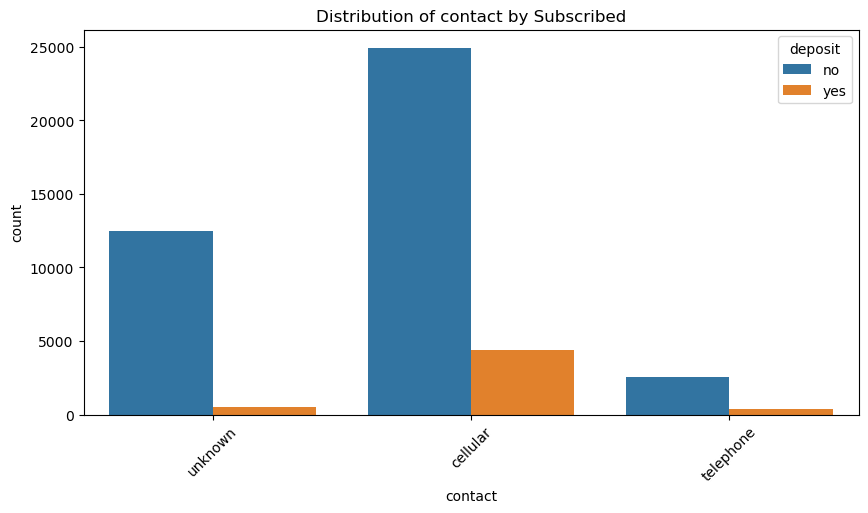

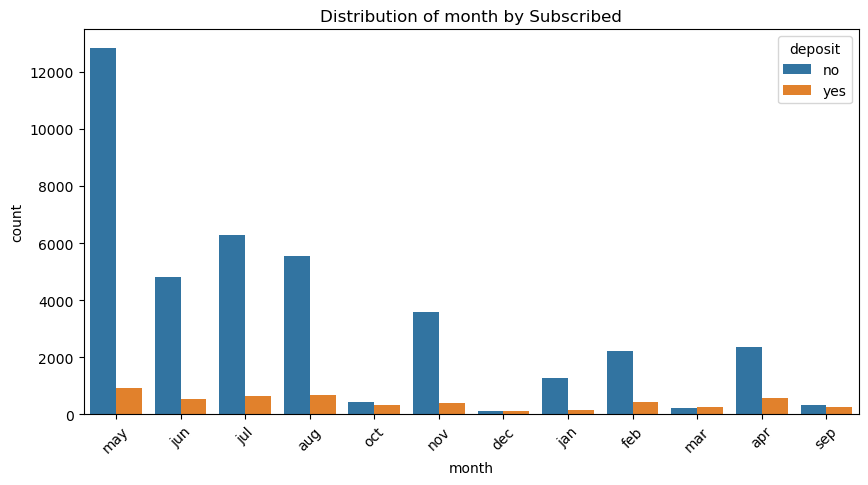

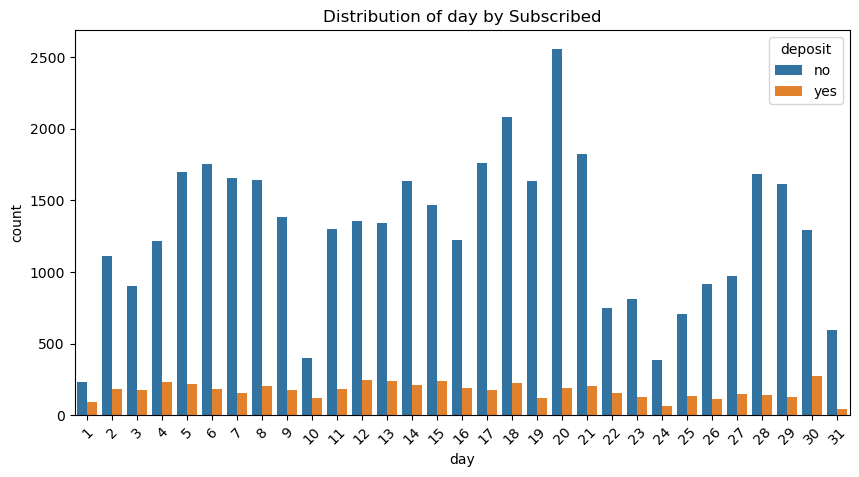

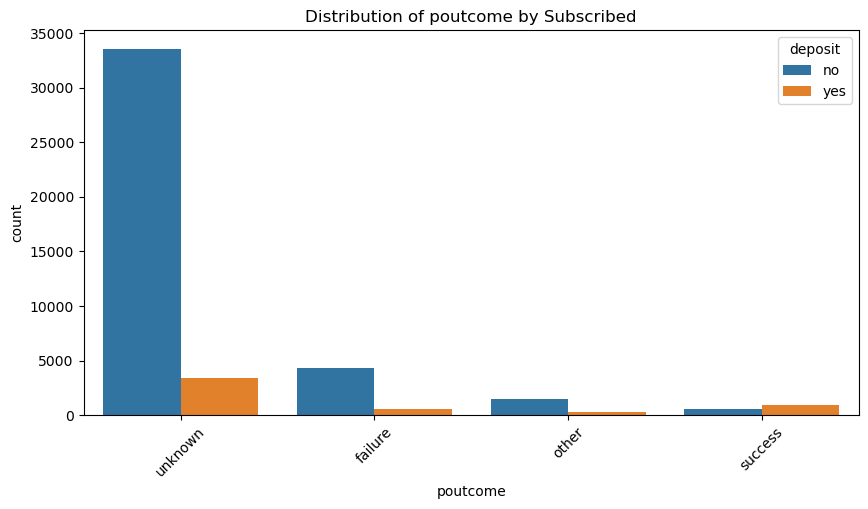

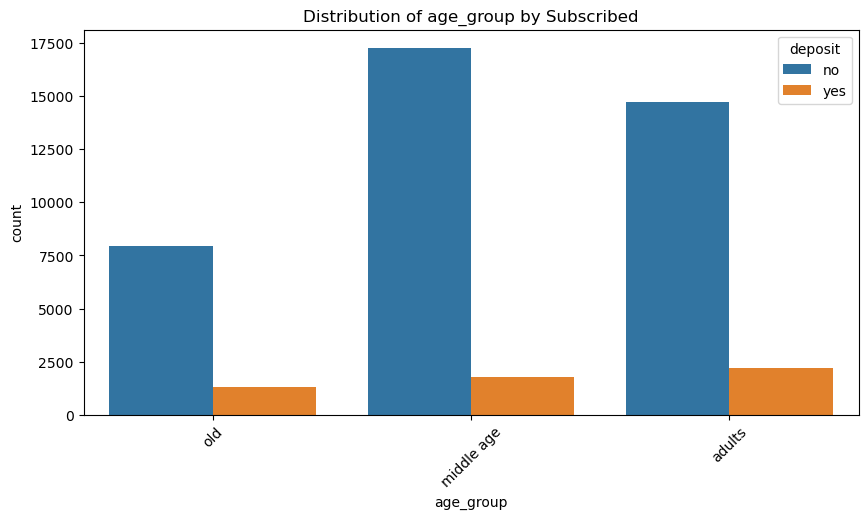

In [16]:
# Bar Plots (Categorical Data)
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'age_group']
for features in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data = df, x = features, hue = 'deposit')
    plt.title(f'Distribution of {features} by Subscribed')
    plt.xticks(rotation=45)
    plt.show()

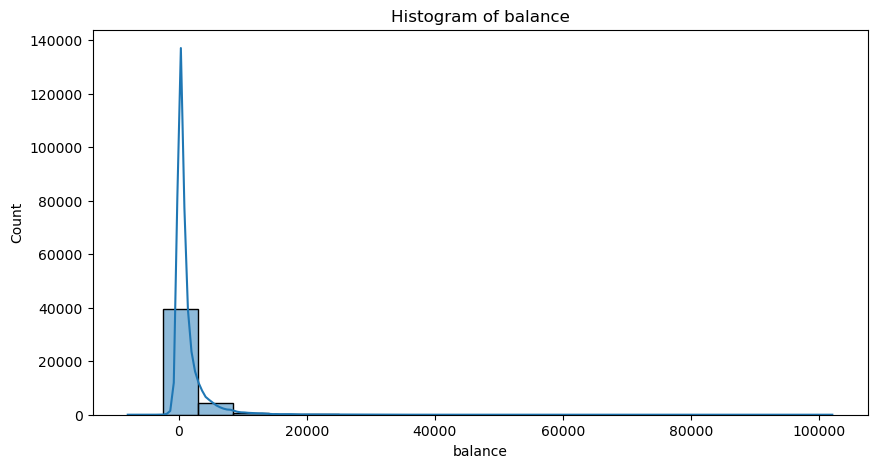

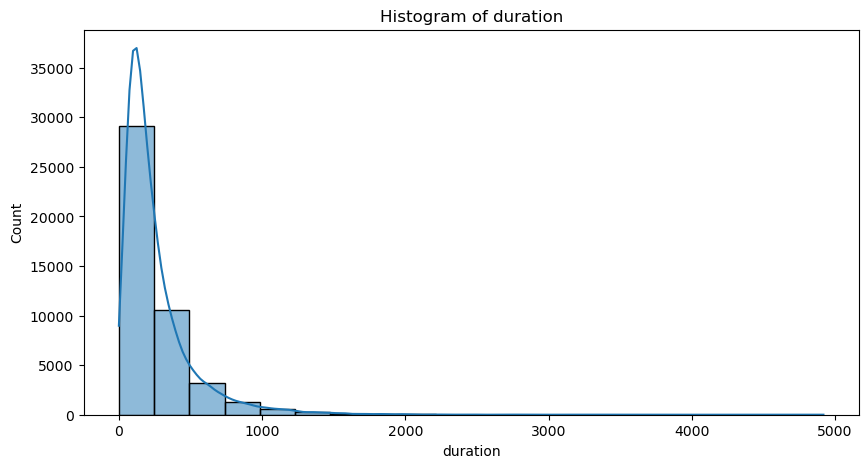

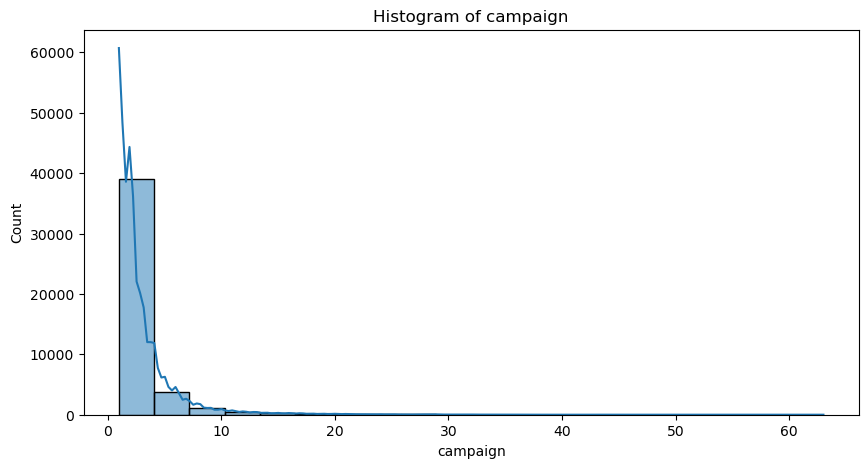

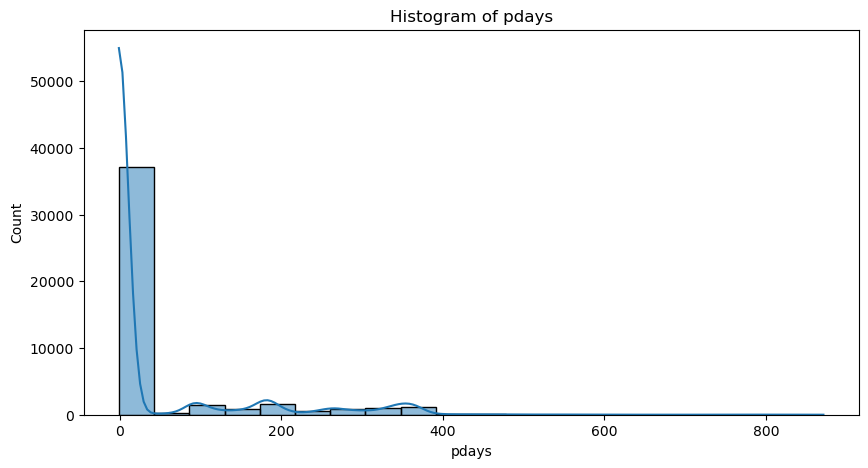

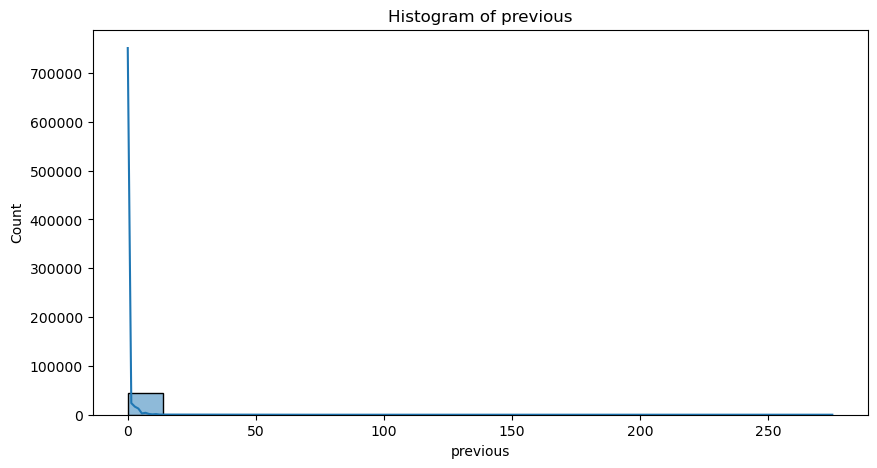

In [17]:
# Histograms (Numerical Data)
numerical_features = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for features in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data = df, x = features, bins=20, kde = True)
    plt.title(f'Histogram of {features}')
    plt.show()

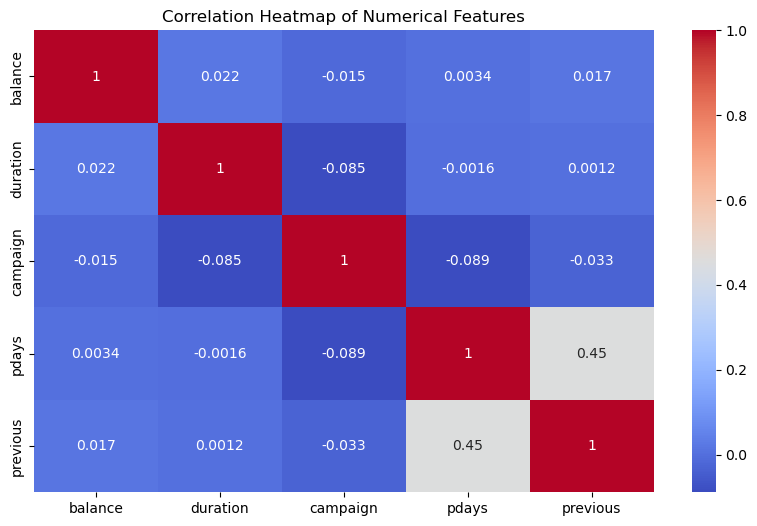

In [18]:
# Correlation Heatmap
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

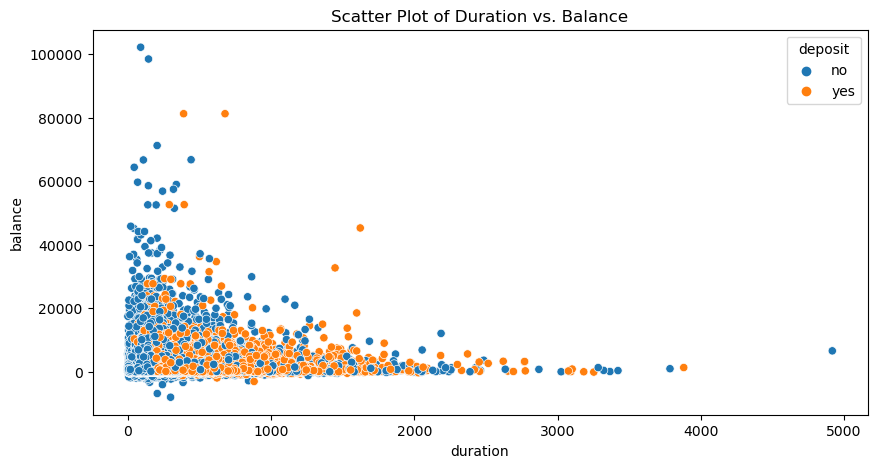

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = 'duration', y = 'balance', hue = 'deposit')
plt.title('Scatter Plot of Duration vs. Balance')
plt.show()

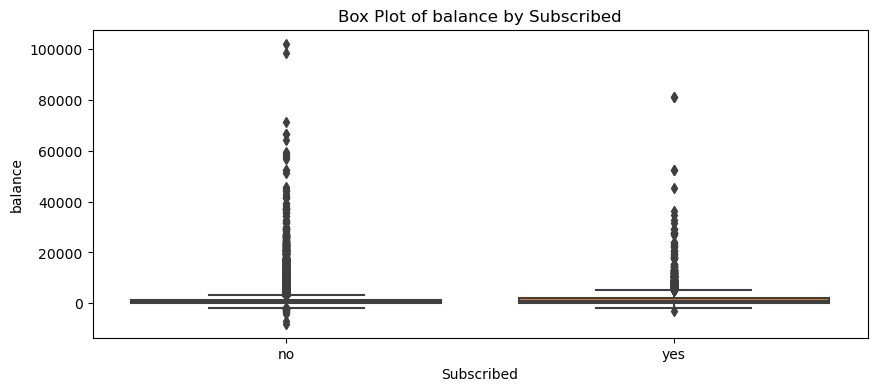

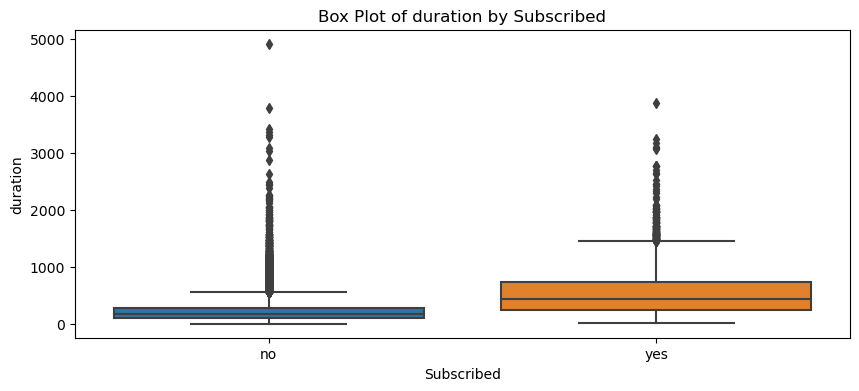

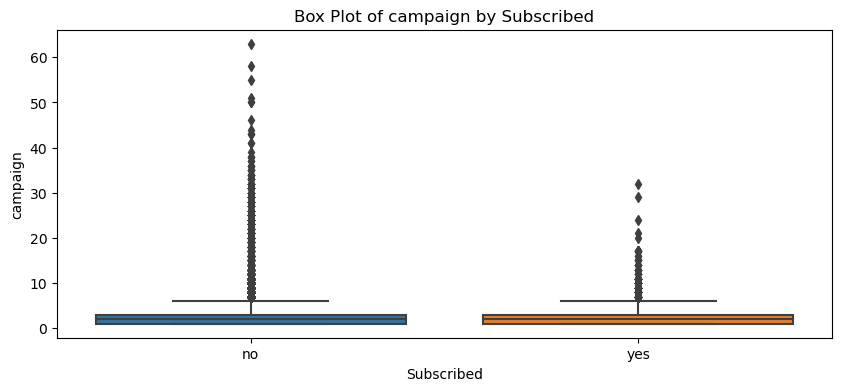

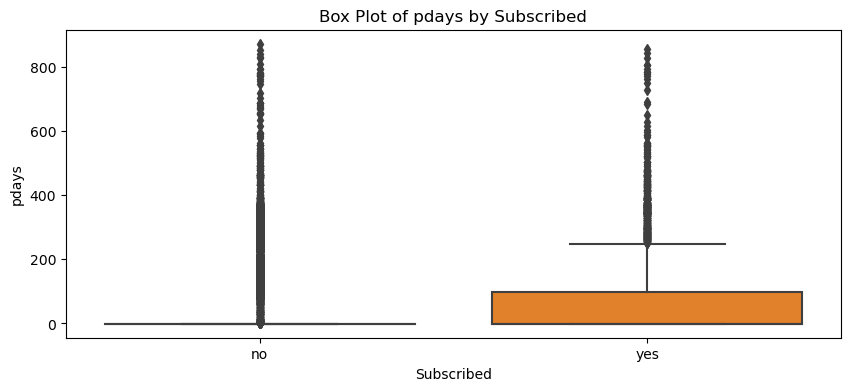

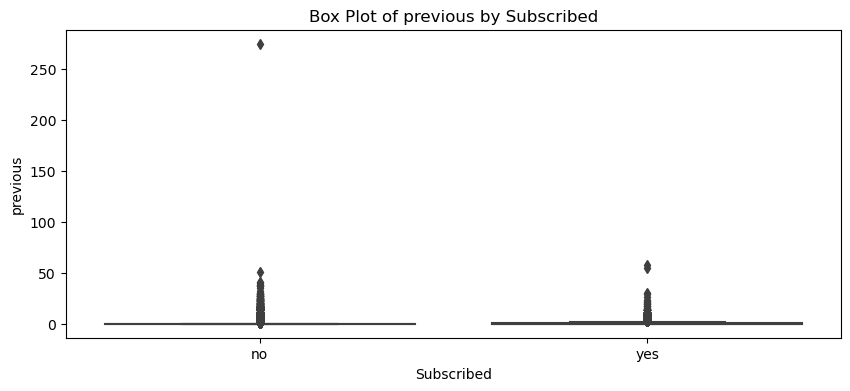

In [20]:
for features in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data = df, x = 'deposit', y = features)
    plt.title(f'Box Plot of {features} by Subscribed')
    plt.xlabel('Subscribed')
    plt.ylabel(features)
    plt.show()


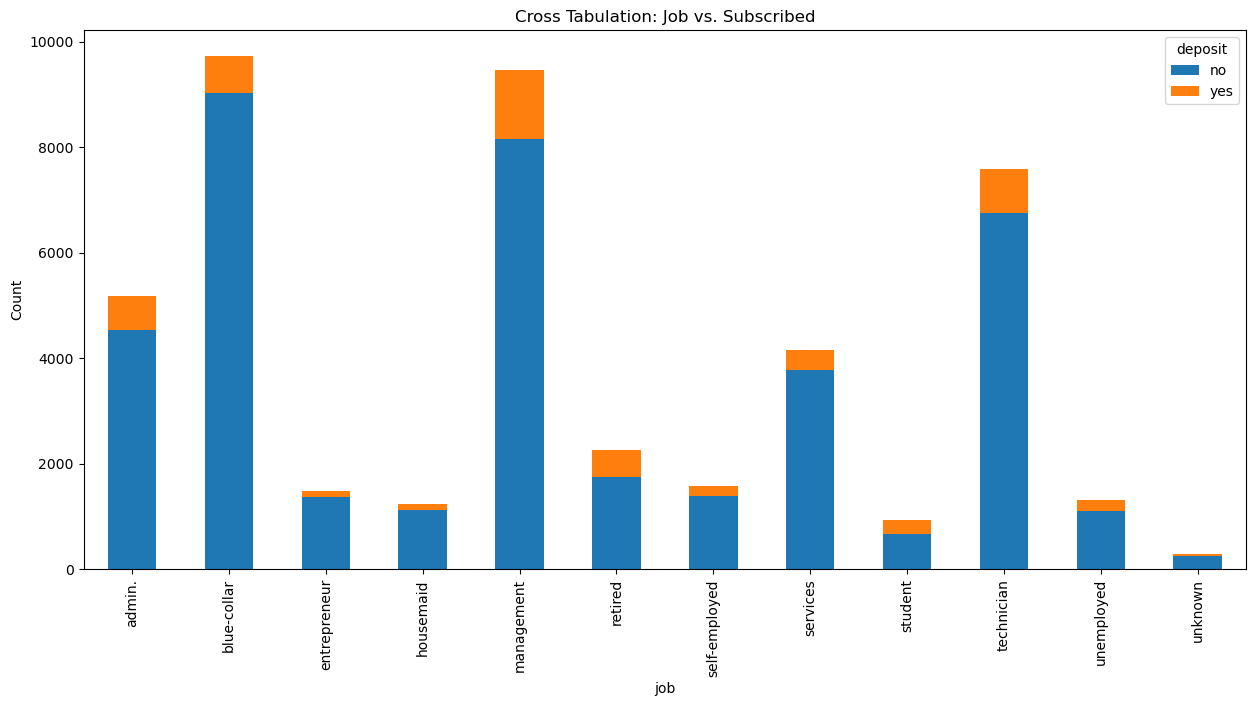

In [21]:
# Cross Tabulations
cross_tab = pd.crosstab(df['job'], df['deposit'])
cross_tab.plot(kind = 'bar', stacked = True, figsize = (15, 7))
plt.title('Cross Tabulation: Job vs. Subscribed')
plt.ylabel('Count')
plt.show()

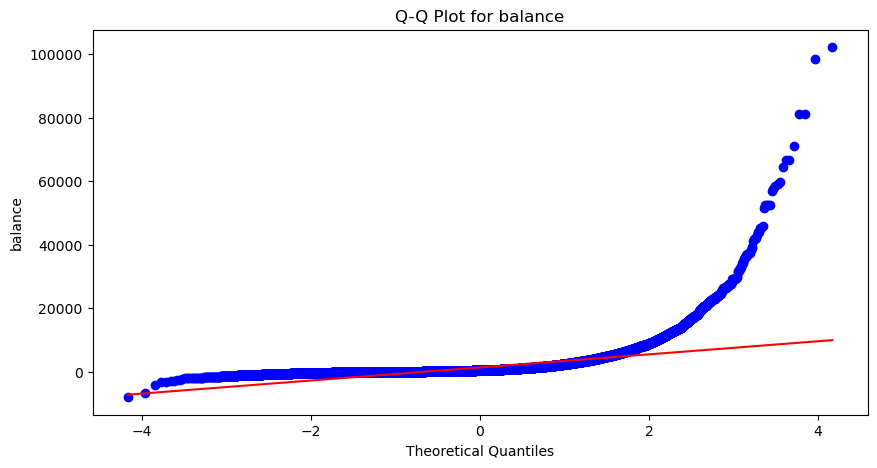

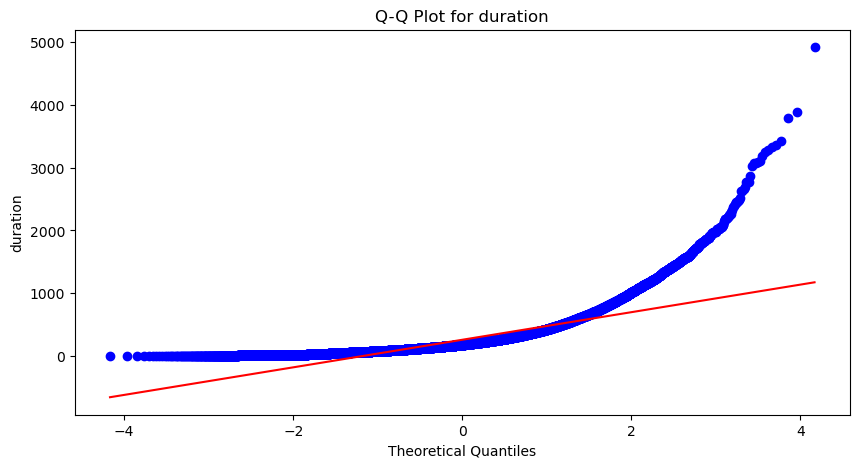

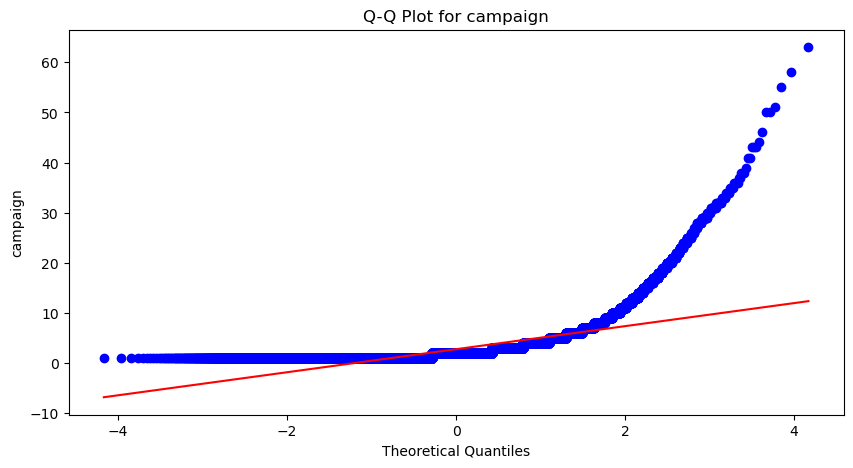

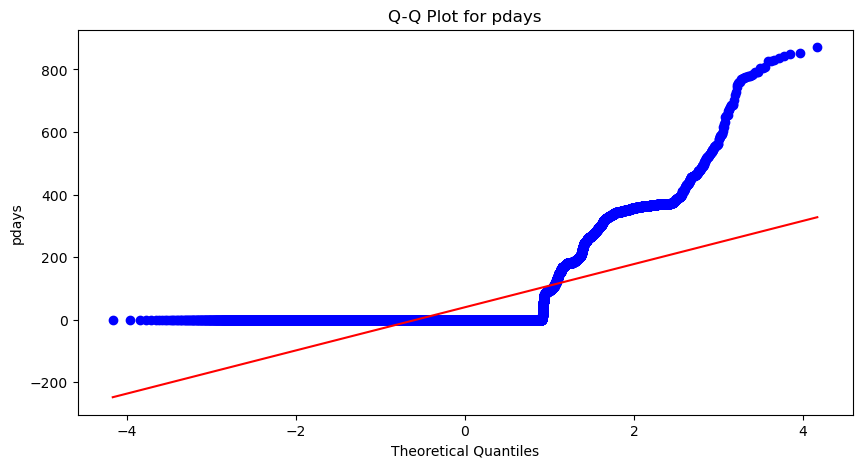

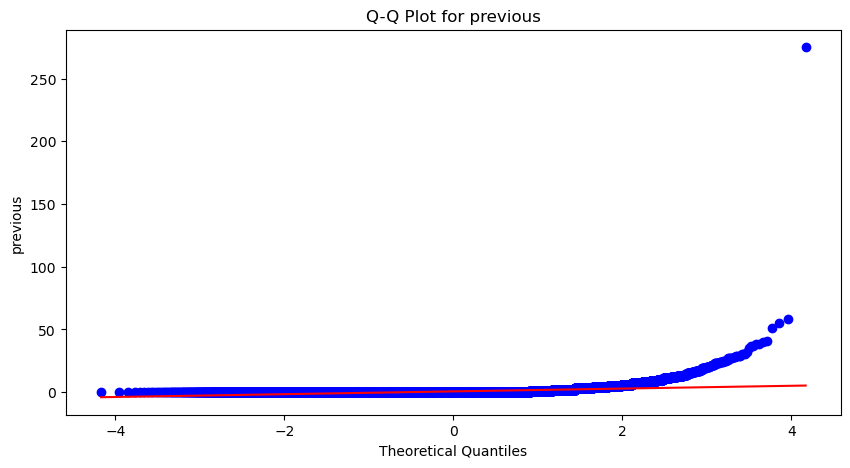

In [22]:
import scipy.stats as stats
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    stats.probplot(df[feature], dist = "norm", plot = plt)
    plt.title(f'Q-Q Plot for {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(feature)
    plt.show()

In [23]:
# Counting the number of "unknown" values for each categorical feature
unknown_value_counts = (df == "unknown").sum()
unknown_value_counts

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
deposit          0
age_group        0
dtype: int64

In [24]:
# Let's check whether the dataset is balanced or imbalanced

# Calculating the class count of target variable
class_count = df.deposit.value_counts()

# Calculating the class count proportion of target variable
class_proportions = class_count / class_count.sum()

class_count

no     39922
yes     5289
Name: deposit, dtype: int64

In [25]:
class_proportions

no     0.883015
yes    0.116985
Name: deposit, dtype: float64

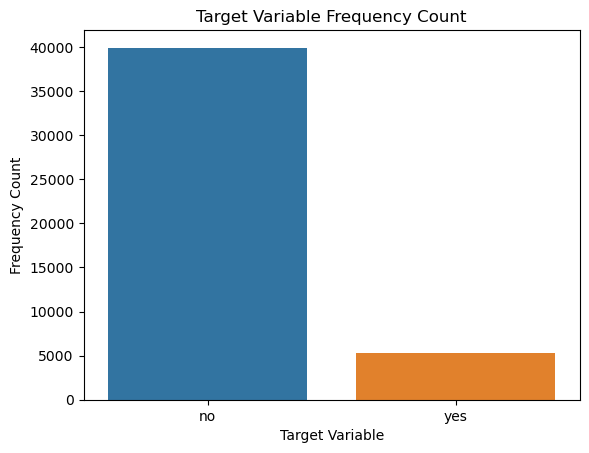

In [26]:
sns.countplot(data = df, x = "deposit")
plt.xlabel("Target Variable")
plt.ylabel("Frequency Count")
plt.title("Target Variable Frequency Count");

* Based on the aforementioned graph, we can observe that the dataset is very unbalanced because the number of "no" responses is excessively higher than "yes" responses for the target variable.
* when the distribution of examples within a dataset is skewed or biased. This can lead to a bias in the trained model, which can negatively impact its performance.

In [27]:
# Encoding the target variable
mapping = {"no":0, "yes":1}
df["target"] = df["deposit"].map(mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,old,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle age,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,adults,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,middle age,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,old,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,old,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,old,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,old,0


In [28]:
df.drop(["deposit", "age"],axis = 1, inplace = True)

In [29]:
# Encoding categorical variables into numerics

nominal_columns = df.select_dtypes(include = "object").columns.tolist()
nominal_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'age_group']

In [30]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, columns = nominal_columns)
df_encoded.head()

,balance,day,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
0,2143,5,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,5,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,5,76,1,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,1506,5,92,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,5,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [31]:
# Performing over sampling on the data to make it balanced
from imblearn.over_sampling import SMOTE
from collections import Counter

# seperating feature and target
x = df_encoded.drop("target", axis = 1)
y = df_encoded["target"]

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
x_resampled, y_resampled = smote.fit_resample(x, y)

print("Class distribution before over sampling:", Counter(y))
print("Class distribution after over sampling:", Counter(y_resampled))

Class distribution before over sampling: Counter({0: 39922, 1: 5289})
Class distribution after over sampling: Counter({0: 39922, 1: 39922})


In [32]:
x_resampled.head()

,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
0,2143,5,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,5,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,5,76,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1506,5,92,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,5,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [33]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state = 45, test_size = 0.25)
x_train

,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_adults,age_group_middle age,age_group_old
4526,2007,20,253,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4623,410,20,112,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
58897,10252,22,174,1,141,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50389,1282,17,540,1,175,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78113,239,5,190,1,91,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12895,85,7,88,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
60960,0,10,93,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6012,576,26,158,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
63107,920,4,1073,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
y_train

4526     0
4623     0
58897    1
50389    1
78113    1
        ..
12895    0
60960    1
6012     0
63107    1
6558     0
Name: target, Length: 59883, dtype: int64

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [38]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
decisionTree.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
decisionTree.score(x_test,y_test)

0.9257552226842343

In [41]:
randomForest = RandomForestClassifier(n_estimators = 1000)
randomForest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [42]:
randomForest.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
randomForest.score(x_test, y_test)

0.9503531887180001

In [44]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [45]:
# Naive Bayes (Gaussian) - No Hyperparameter Tuning Needed
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
y_pred_nb = nb_model.predict(x_test_scaled)
print("\nNaive Bayes (Gaussian):")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes (Gaussian):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10014
           1       0.90      0.87      0.88      9947

    accuracy                           0.89     19961
   macro avg       0.89      0.89      0.89     19961
weighted avg       0.89      0.89      0.89     19961

Accuracy: 0.886127949501528


In [46]:
# Decision Tree with Hyperparameter Tuning
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(x_train_scaled, y_train)
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(x_test_scaled)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10014
           1       0.93      0.92      0.93      9947

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961

Accuracy: 0.9278593256850859


In [47]:
# Logistic Regression with Hyperparameter Tuning
lr_model = LogisticRegression()
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr_model, lr_params, cv = 5)
lr_grid.fit(x_train_scaled, y_train)
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(x_test_scaled)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10014
           1       0.97      0.91      0.94      9947

    accuracy                           0.94     19961
   macro avg       0.95      0.94      0.94     19961
weighted avg       0.95      0.94      0.94     19961

Accuracy: 0.9444416612394169


In [48]:
# Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(x_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(x_test_scaled)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10014
           1       0.97      0.93      0.95      9947

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961

Accuracy: 0.9499524071940284


In [49]:
# K-Nearest Neighbors with Weighted Distance and Hyperparameter Tuning
knn_model = KNeighborsClassifier(weights='distance')
knn_params = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(x_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(x_test_scaled)
print("\nK-Nearest Neighbors (Weighted Distance):")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors (Weighted Distance):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10014
           1       0.97      0.91      0.94      9947

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961

Accuracy: 0.9406843344521818


In [50]:
# Gradient Boosting with Hyperparameter Tuning
gb_model = GradientBoostingClassifier()
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)
gb_grid.fit(x_train_scaled, y_train)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(x_test_scaled)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10014
           1       0.96      0.94      0.95      9947

    accuracy                           0.95     19961
   macro avg       0.95      0.95      0.95     19961
weighted avg       0.95      0.95      0.95     19961

Accuracy: 0.9494013325985672


In [51]:
# Support Vector Machine (SVM) with Hyperparameter Tuning
# svm_model = SVC()
# svm_params = {'C': [0.1, 1, 10],  'gamma': [0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}
# svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
# svm_grid.fit(x_train_scaled, y_train)
# svm_best = svm_grid.best_estimator_
# y_pred_svm = svm_best.predict(x_test_scaled)
# print("Support Vector Machine:")
# print(classification_report(y_test, y_pred_svm))
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))

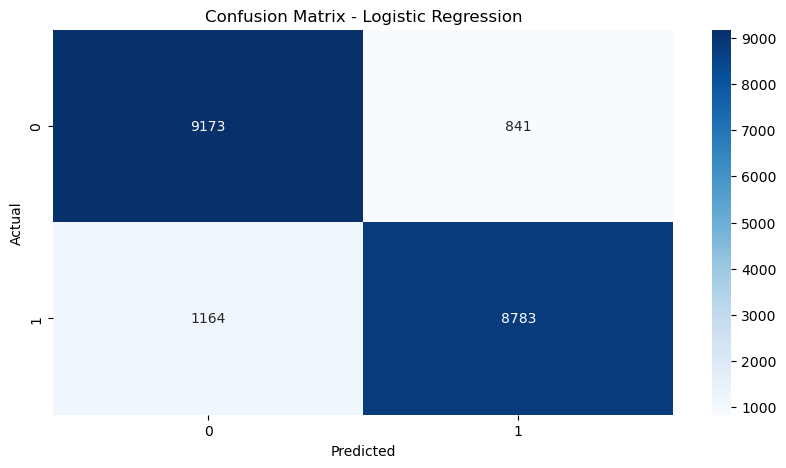

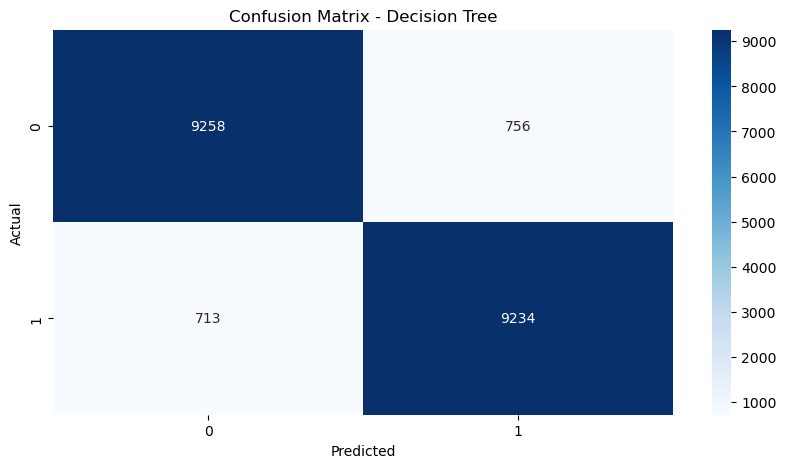

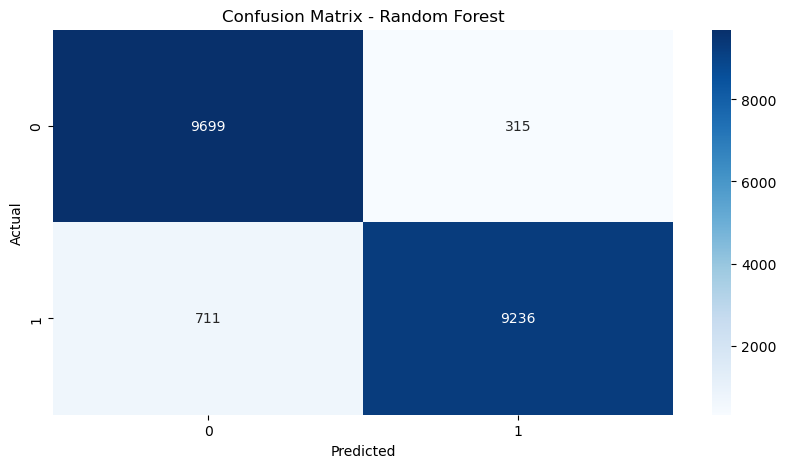

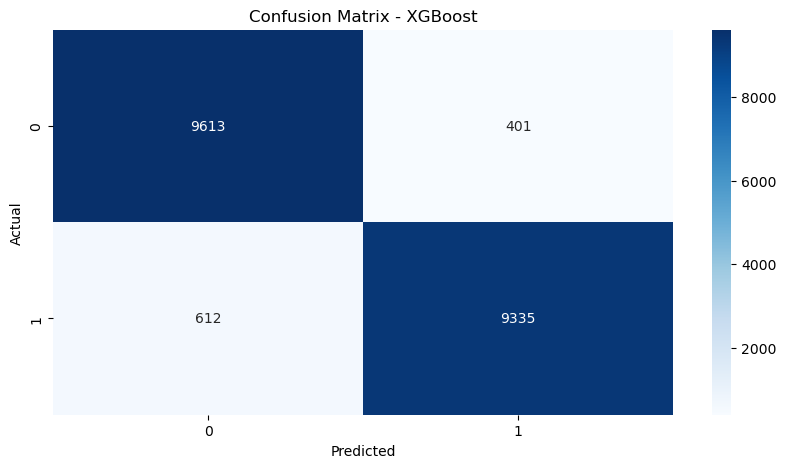

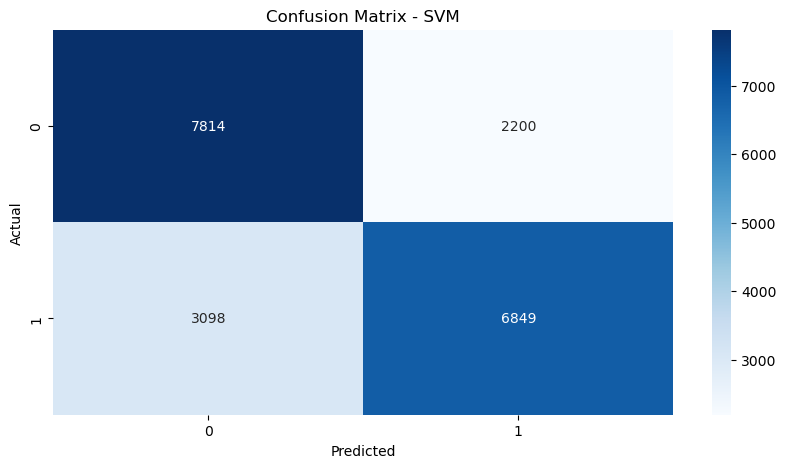

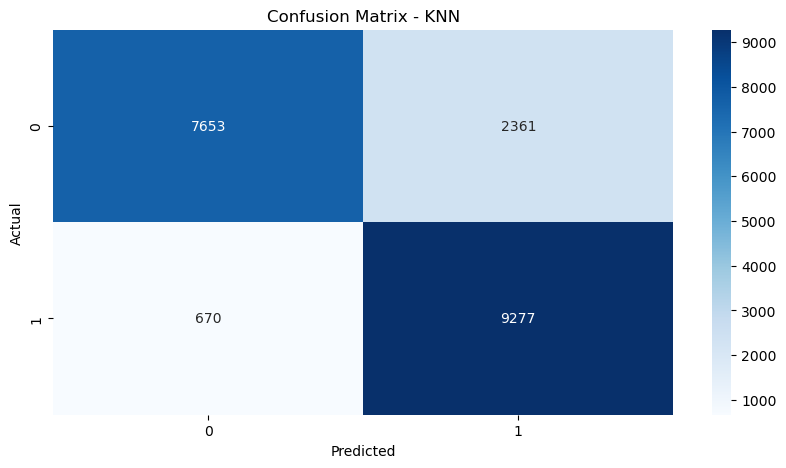

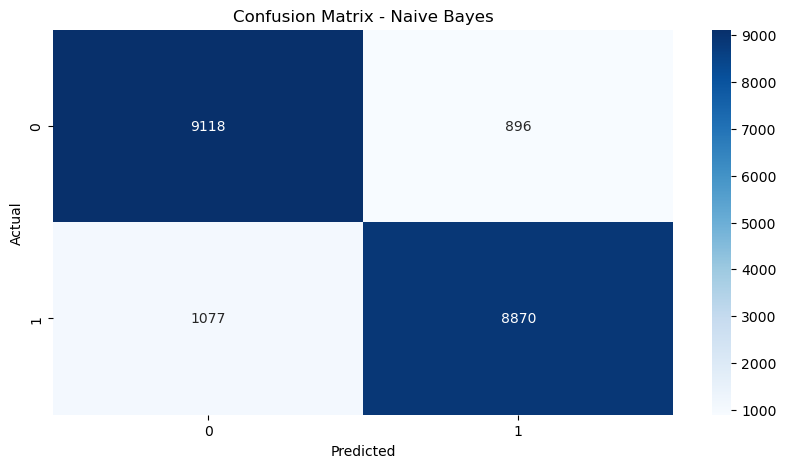

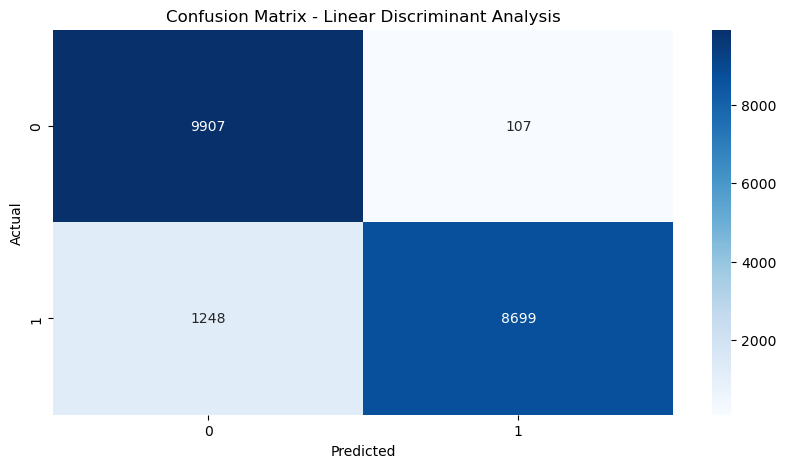

In [52]:
from sklearn.metrics import confusion_matrix
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}
# Loop through each model, train, predict, and compute confusion matrix
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

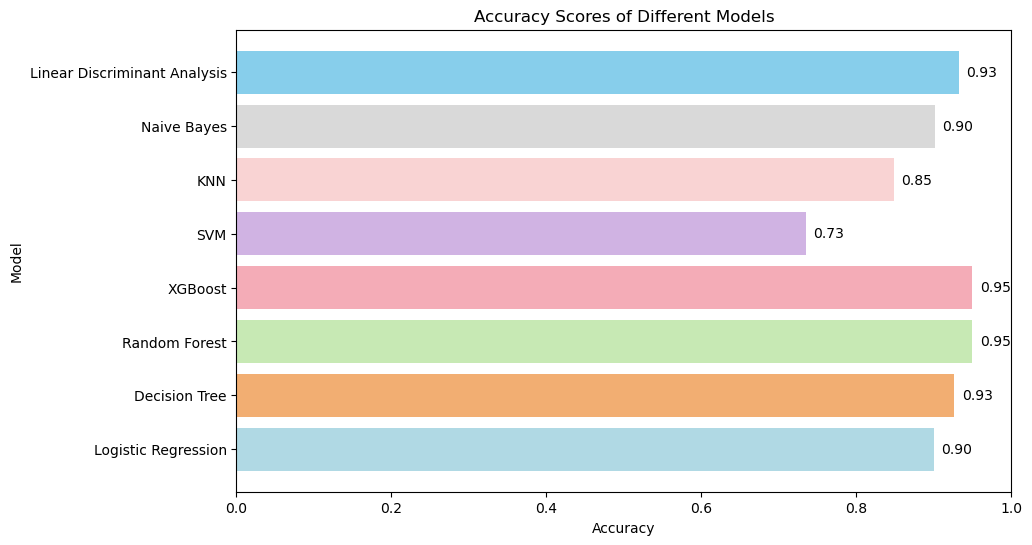

In [53]:
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Loop through each model, train, predict, and store accuracy
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracy_scores.append(accuracy)

# Define colors for each bar
colors = ['#b0d9e4', '#f2ae72', '#c7e9b4', '#f4acb7', '#d0b3e3', '#f9d3d3', '#d9d9d9', 'skyblue']

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color = colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0, 1)  # Set x-axis limit to better visualize differences

# Label the accuracy scores on the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va = 'center')

plt.show()
    


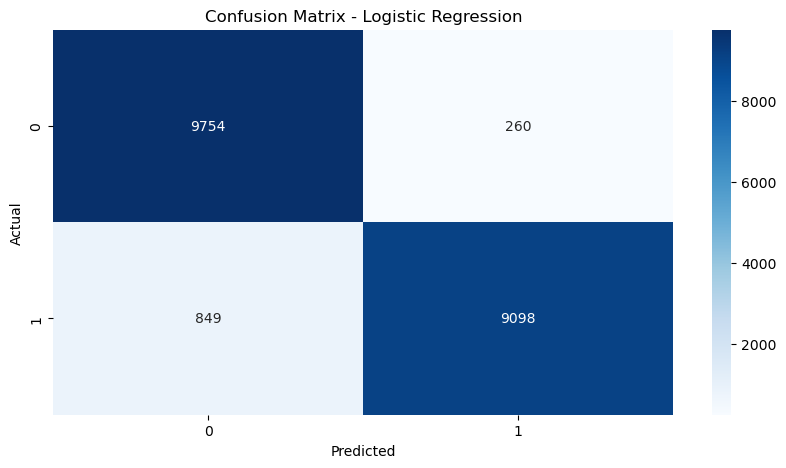

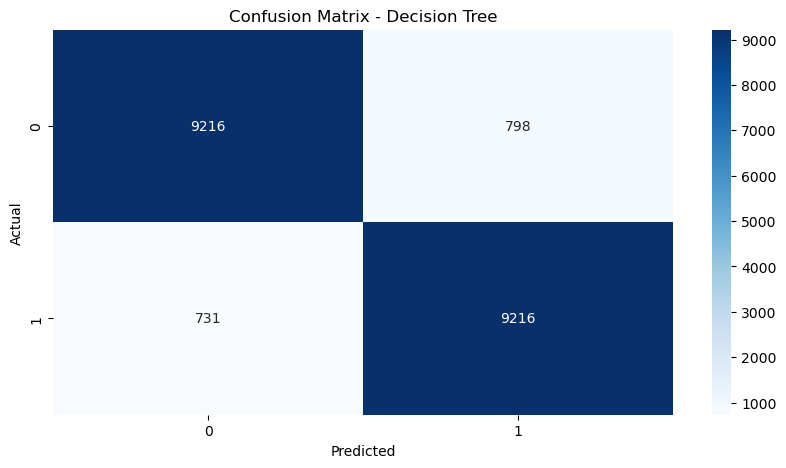

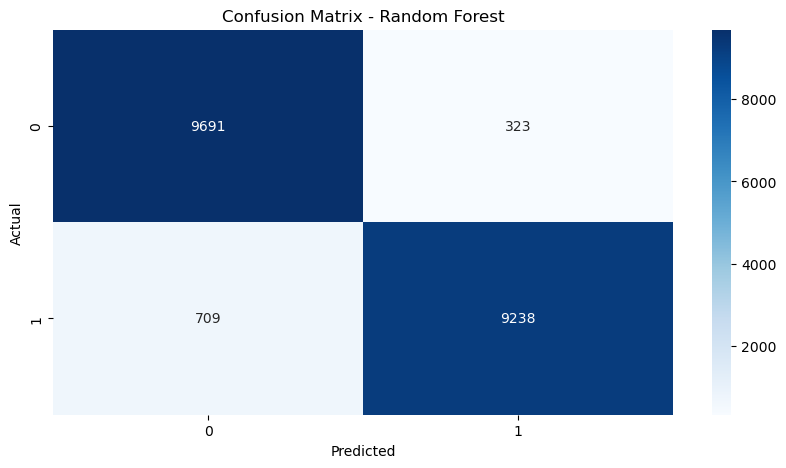

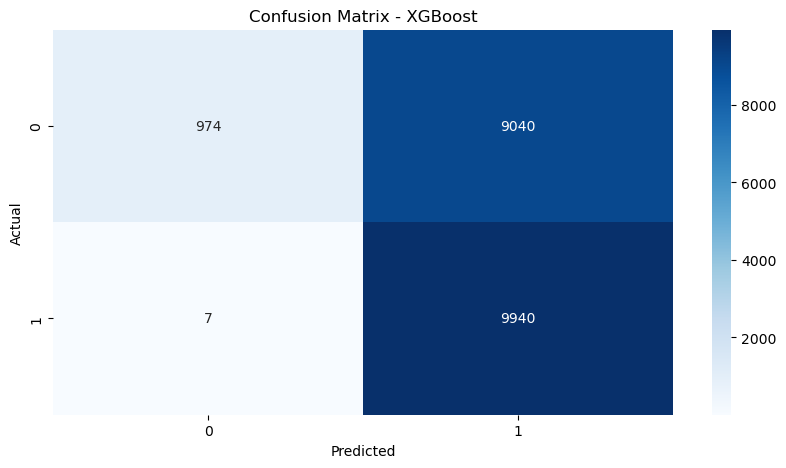

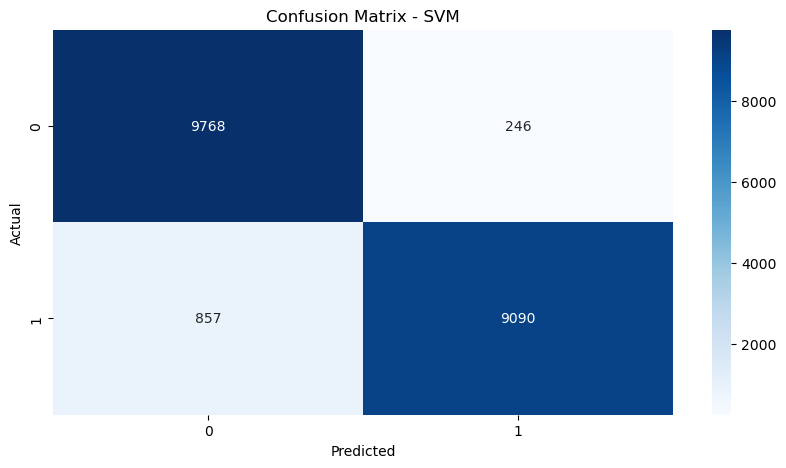

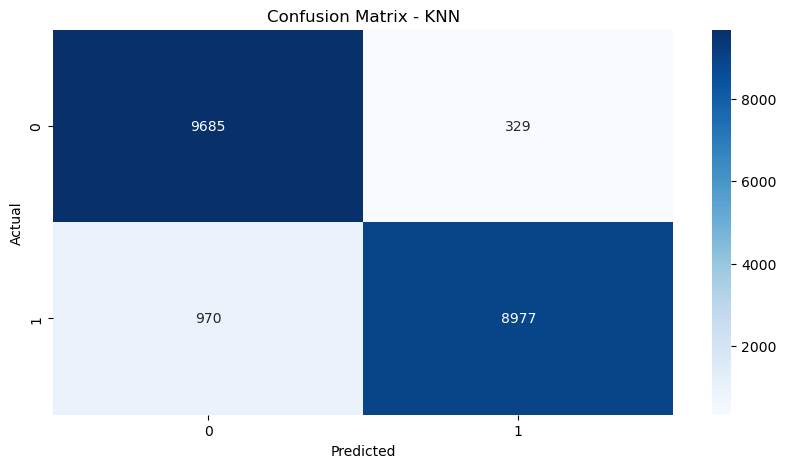

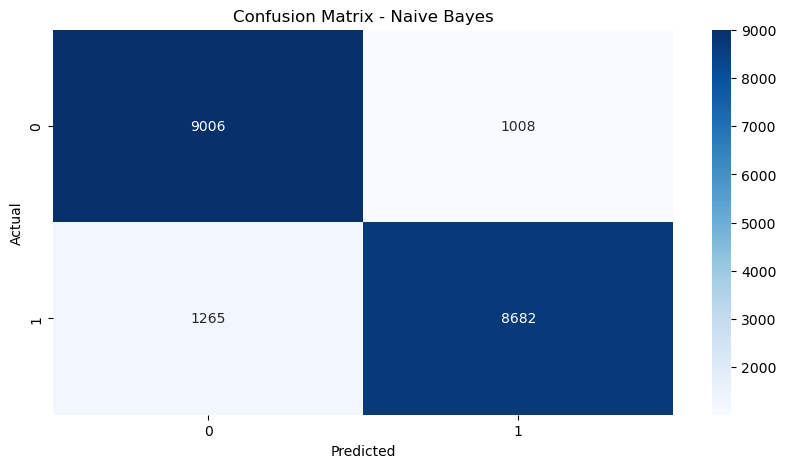

In [54]:
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    # Add other models here
}

# Loop through each model, train, predict, and compute confusion matrix
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize = (10, 5))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

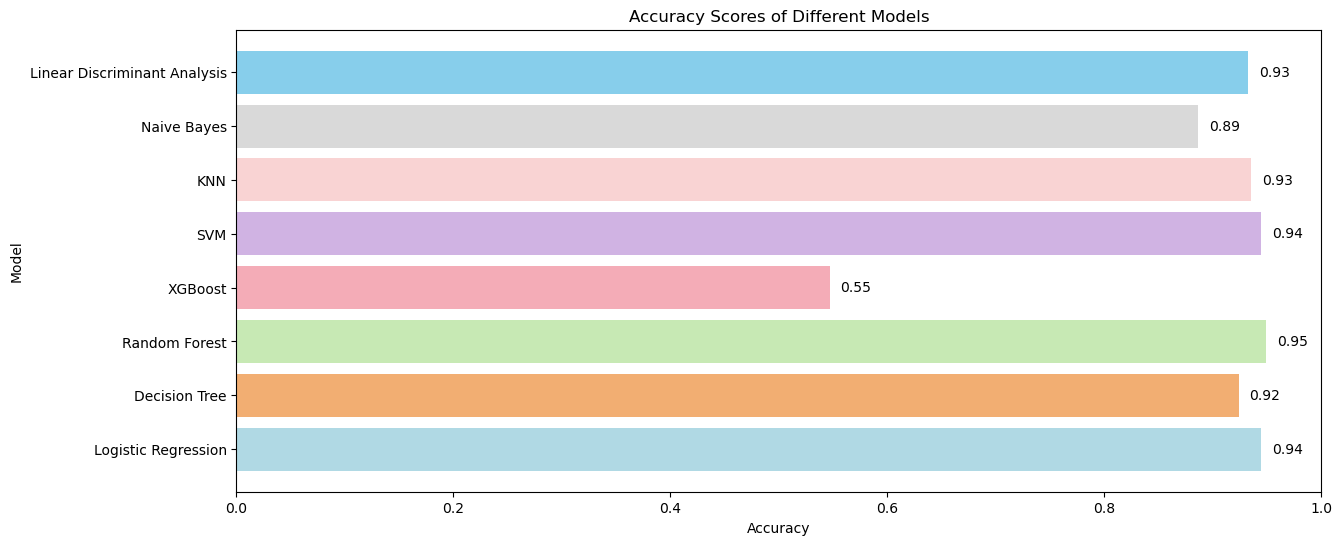

In [55]:
# Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
}

# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Loop through each model, train, predict, and store accuracy
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_names.append(name)
    accuracy_scores.append(accuracy)

# Define colors for each bar
colors = ['#b0d9e4', '#f2ae72', '#c7e9b4', '#f4acb7', '#d0b3e3', '#f9d3d3', '#d9d9d9', 'skyblue']

# Plot the accuracy scores
plt.figure(figsize = (14, 6))
plt.barh(model_names, accuracy_scores, color = colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0, 1)  # Set x-axis limit to better visualize differences

# Label the accuracy scores on the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va = 'center')

plt.show()

# Data Analysis Summary:

#### Steps Involved in this Project:

* Data Collection: Bank marketing data source kaggle.

* Data Cleaning & Preprocessing: Process, identifying null values, removing duplicates if any.

* EDA (Exploratory Data Analysis): Data Exploration such as dataset information, descriptive statistics, correlation, detecting outliers if any, etc.

* Data Visualization: Created various charts such as (Barplot, Histogram, Boxplot, Scatterplot, Q-Q plots etc.) to visualize numerical, categorical, and binary data.

* ML Model Building: Deployed different machine learning algorithms to predict client term deposit variable (y) or (target).

#### Algorithms used in this project are:

a. Logistic Regression

b. Decision Tree

c. Random Forest

d. Naive Bayes

e. Gradient Boosting Classifier

f. KNearestneighbors (KNN)

g. Linear Discriminant Analysis

* Data Standardize: Standardized the data using StandardScaler() from sklearn.preprocessing. Standardizing the data improves performance of the model thus increases accuracy. I have tried with both normal data and standardized data.

* Hyperparameter Tuning: For Every algorithms I have tried using different parameters to improve accuracy of the model.

### Model Selection:

* After carefully analyzing all the models two models are emerged as a winner for this dataset which is XGBoost, Random Forest which are giving accuracy of around 0.95 or 95% which is great while considering data which has outliers.

* The data also contains values as "unknown" in features like "job", "contact", "education", "poutcome".

* I haven't removed any outliers due to lack of information about the data. So it's safe to keep outliers as it is.

* The accuracy is also getting impacted because of the outliers. There are many outliers in the data, and data itself is imbalanced the count of "no" is around 0.90 whereas "yes" is about 0.10. which affect model accuracy.